In [2]:
%config IPCompleter.greedy=True


# CIFAR-10 Multiple Classes

Let's go over another example of using Keras and building out CNNs. This time will use another famous data set, the CIFAR-10 dataset which consists of 10 different image types.

[multi_gpu_guide](https://towardsdatascience.com/multi-gpu-multi-process-with-tensorflow-ba4cc2fe3ab7)

In [3]:
import pandas as pd
import numpy as np

-----

# The Data

CIFAR-10 is a dataset of 50,000 32x32 color training images, labeled over 10 categories, and 10,000 test images.

In [4]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [5]:
x_train.shape

(50000, 32, 32, 3)

In [6]:
x_train[0].shape

(32, 32, 3)

In [7]:
import matplotlib.pyplot as plt

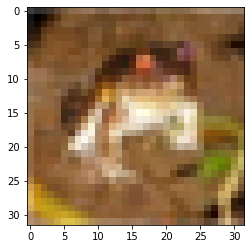

In [8]:
# FROG
plt.imshow(x_train[0])

In [9]:
y_train[0]

array([6], dtype=uint8)

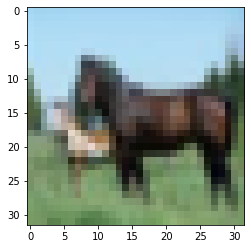

In [10]:
# HORSE
plt.imshow(x_train[12])

# PreProcessing

In [11]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [12]:
x_train[0].shape

(32, 32, 3)

In [13]:
x_train.max()

255

In [14]:
x_train = x_train/225

In [15]:
x_test = x_test/255

In [16]:
x_train.shape

(50000, 32, 32, 3)

In [17]:
x_test.shape

(10000, 32, 32, 3)

In [18]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

## Labels

In [19]:
from tensorflow.keras.utils import to_categorical

In [20]:
y_train.shape

(50000, 1)

In [21]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [22]:
y_cat_train = to_categorical(y_train,10) #1-hot encoding
y_cat_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [23]:
y_cat_train.shape

(50000, 10)

In [24]:
print(len(y_cat_train[0]))
y_cat_train[0]

10


array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [25]:
y_cat_test = to_categorical(y_test,10)
y_cat_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [26]:
y_train[0]

array([6], dtype=uint8)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


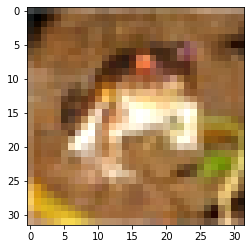

In [27]:
plt.imshow(x_train[0]) #6:frog

[filter number guide in cnn](https://www.pyimagesearch.com/2018/12/31/keras-conv2d-and-convolutional-layers/)
##### Numbe of  filter : recommend using powers of 2 as the values
* Layers early in the network architecture (i.e., closer to the actual input image) learn fewer convolutional filters while layers deeper in the network (i.e., closer to the output predictions) will learn more filters.

* Conv2D layers in between will learn more filters than the early Conv2D layers but fewer filters than the layers closer to the output. Let’s go ahead and take a look at an example:

* Notice at as our output spatial volume is decreasing our number of filters learned is increasing — this is a common practice in designing CNN architectures 

* You may need to tune the exact value depending on (1) the complexity of your dataset and (2) the depth of your neural network, but I recommend starting with filters in the range [32, 64, 128] in the earlier and increasing up to [256, 512, 1024] in the deeper layers.( As far as choosing the appropriate number of filters , I nearly always recommend using powers of 2 as the values.)

* Again, the exact range of the values may be different for you, but start with a smaller number of filters and only increase when necessary.

#### kernel : a 2-tuple specifying the width and height of the 2D convolution window (kernel_size  must be an odd integer)

* Typical values for kernel_size  include: (1, 1) , (3, 3) , (5, 5) , (7, 7) . It’s rare to see kernel sizes larger than 7×7.

Above, you can see that the output of every Conv2D and MaxPooling2D layer is a 3D tensor of shape (height, width, channels). The width and height dimensions tend to shrink as you go deeper in the network. The number of output channels for each Conv2D layer is controlled by the first argument (e.g., 32 or 64). Typically,  as the width and height shrink, you can afford (computationally) to add more output channels in each Conv2D layer.

[convolution layer, kernel](https://www.sicara.ai/blog/2019-10-31-convolutional-layer-convolution-kernel)

# Channel, Filter, Kernel 
###  Channel : In practicality, most input images have 3 channels(RGB), and that number only increases the deeper you go into a network. It’s pretty easy to think of channels, in general, as being a “view” of the image as a whole, emphasising some aspects, de-emphasising others.[(Reference : Irhum Shafkat)](https://towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1)
![channel1](channel1.jpeg)
* Most of the time, we deal with RGB images with three channels. [ (Photo by Andre Mouton) ](https://unsplash.com/photos/_d3sppFprWI) 

###  A filter: A collection of kernels, in case of multiple channels
![channel](channel.png)
*  whereas in the 1 channel case, where the term filter and kernel are interchangeable,

##  Each filter in a convolution layer produces one and only one output channel.
1. Each of the kernels of the filter “slides” over their respective input channels, producing a processed version of each. Some kernels may have stronger weights than others, to give more emphasis to certain input channels than others (eg. a filter may have a red kernel channel with stronger weights than others, and hence, respond more to differences in the red channel features than the others).
![output1](output1.gif)

2. Each of the per-channel processed versions are then summed together to form one channel. The kernels of a filter each produce one version of each channel, and the filter as a whole produces one overall output channel.
![output2](output2.gif)

3.  Finally, then there’s the bias term. The way the bias term works here is that each output filter has one bias term. The bias gets added to the output channel so far to produce the final output channel.
![output3](output3.gif)

## 2D(7x7) input matrix with 3 channels (RGB) - each filter consists of 3 kernels( A filter is a collection of 3 kernels)

### * Each filter actually happens to be a collection of kernels, with there being one kernel for every single input channel to the layer, and each kernel being unique.
#### * Whereas in the 1 channel case, where the term filter and kernel are interchangeable.
![filter](filter.png)

### In case of CNN layer
[cnn basic Irhum Shafkat](https://towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1)
* <span style="color:red"> **kernel**</span>, __*(3,3) matrix of weights*__ with only <span style="color:red">9 parameters</span> for CNN
```
[[0,1,2],
 [2,2,0],
 [0,1,2]]      
```
“slides” over the __*2D input data(5,5 matrix)*__,``With stride =1 and valid padding(no padding)``, performing an elementwise multiplication with the part of the input it is currently on, and then summing up the results into a single output pixel. __*Output (3,3) matrix*__.

* Convolutions allow us to do this transformation with only 9 parameters, with each output feature, instead of “looking at” every input feature, only getting to “look” at input features coming from roughly the same location. 

![kernel_slide](kernel_slide.gif)
* The kernel repeats this process for every location it slides over, converting a 2D matrix of features into yet another 2D matrix of features. 
* The output features are essentially, the weighted sums (with the weights being the values of the kernel itself) of the input features located roughly in the same location of the output pixel on the input layer.

###  In case of standard fully connected layer
* 5×5=25 input features, weight matrix 25x9= 225 ,which is kernel in cnn layer, and 3×3=9 output features
* We need weight matrix of 25×9 = <span style="color:red">225 parameters</span>, with every output feature being the weighted sum of every single input feature.

[Following contents are from the cnn artilce written by Sumit Saha
](https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53)


# Convolution Layer — The Kernel
###  The role of the ConvNet is to reduce the images into a form which is easier to process, without losing features which are critical for getting a good prediction.
### The Kernel shifts 9 times- convolution with same padding , zero padding with stride =1
![Image_convlovedFeature](kernel.gif)

Kernel/Filter, K = 
```
1  0  1
0  1  0
1  0  1
```
* Convoluting a 5x5x1 image with a 3x3x1 kernel to get a 3x3x1 convolved feature
* Image Dimensions = 5 (Height) x 5 (Breadth) x <span style="color:blue">1 (Number of channels, eg. RGB)</span>
In the above demonstration, the green section resembles our 5x5x1 input image, I. The element involved in carrying out the convolution operation in the first part of a Convolutional Layer is called the Kernel/Filter, K, represented in the color yellow. We have selected K as a 3x3x1 matrix.
* The Kernel shifts 9 times because of Stride Length = 1 (Non-Strided), every time performing a matrix multiplication operation between K and the portion P of the image over which the kernel is hovering.

In [28]:
# first instance of 'input_img * feature_k = convolved_feature'
import numpy as np
input_img = np.array(
[[1, 1, 1],
 [0, 1, 1],
 [0, 0 ,1]]
)
feature_k = np.array(
[[1, 0, 1],
 [0, 1, 0],
 [1, 0, 1]]
)
sum(sum(input_img*feature_k)) #4

4

![cnn operation](cnnop.gif)
* Convolution operation on a MxNx3 image matrix with a 3x3x3(width, height, channel-depth) Kernel/Filter, K,
* In the case of images with <span style="color:blue">multiple channels (e.g. RGB)</span>, the Kernel has the same depth(3) as that of the input image. Matrix Multiplication is performed between Kn(Kernel) and In(Input) stack ([K1, I1]; [K2, I2]; [K3, I3]) and all the results are summed with the bias to give us a squashed one-depth channel Convoluted Feature Output.

### The objective of the Convolution Operation is to extract the high-level features such as edges, from the input image. 
* ConvNets need not be limited to only one Convolutional Layer. Conventionally, the first ConvLayer is responsible for capturing the Low-Level features such as edges, color, gradient orientation, etc. 
* With added layers, the architecture adapts to the High-Level features as well, giving us a network which has the wholesome understanding of images in the dataset, similar to how we would

[cnn padding very useful](https://deeplizard.com/learn/video/qSTv_m-KFk0)

# Padding :  
## Pad the edges with extra, “fake” pixels (usually of value 0, hence the oft-used term “zero padding”)
## The kernel when sliding can allow the original edge pixels to be at its center, while extending into the fake pixels beyond the edge, producing an output the same size as the input.
### 1. In case of without padding :  ( valid padding)- default in Conv2D

* Case1: Input(n,n): (6,6), Filter(f,f): (3,3), stride 1 => 4 by 4 matrix: (n-f+1) x (n-f+1)
![padding1](padding1.png) 
* So if you take this gray scale image.<span style="color:green">The pixel in the corner</span> will only get covers one time.(The pixels on the edge are never at the center of the kernel) but if you take <span style="color:red">the middle pixel</span> it will get covered more than once basically what does that means is we have more info on that middle pixel so these are the two main downsides([Article](https://medium.com/@ayeshmanthaperera/what-is-padding-in-cnns-71b21fb0dd7))
    * Shrinking outputs(If we start out with a 4 x 4 image, for example, then just after a convolutional layer or two, the resulting output may become almost meaningless with how small it becomes.)
    * Loosing information on corners of the image( the information around the edges of the input.)


* Case2: Input(n,n): (4,4), Filter(f,f): (3,3), stride 1 => 2 by 2 matrix: (n-f+1) x (n-f+1)
![padding1](padding1_1.png)
### To overcome this problem, we can introduce Padding to an image. (ex. same padding with zero padding)
#### With each convolutional layer, just as we define how many filters to have and the size of the filters, we can also specify whether or not to use padding.


###  2. Same padding with zero padding
* It’s an additional layer(zero-padding: symmetrically adding zeroes to the input matrix) that we can add to the border of an image.For an example see the figure below there one more layer added to the ``4*4 image`` and now it has converted in to ``6*6 image``(If zero padding = 1, there will be one pixel thick around the original image with pixel value = 0. Also stride = 1)
![padding2](padding2_1.png)
### zero-padding
    * zero-padding is a commonly used modification that allows the size of the input to be adjusted to our requirement. It is mostly used in designing the CNN layers when the dimensions of the input volume need to be preserved in the output volume.
* So now there is more frame that covers the edge pixels of an image
* The kernel(Filter,matrix of weights) when sliding can allow the original edge pixels to be at its center, while extending into the fake pixels(value 0) beyond the edge, producing an output the same size as the input.

### padding test
* x: input image of shape [2, 3], 1 channel
* valid_pad: max pool with 2x2 kernel, stride 2 and VALID padding.
* same_pad: max pool with 2x2 kernel, stride 2 and SAME padding (this is the classic way to go)

#### The output shapes are:
* valid_pad: here, no padding so the output shape is [1, 1]
* same_pad: here, we pad the image to the shape [2, 4] (with -inf and then apply max pool), so the output shape is [1, 2]

# Padding: same(padding) vs. valid(no padding)
* When stride is 1 (more typical with convolution than pooling), we can think of the following distinction:

* "SAME": output size is the same as input size. This requires the filter window to slip outside input map, hence the need to pad.
* "VALID": Filter window stays at valid position inside input map, so output size shrinks by filter_size - 1. No padding occurs.

## 1. Same padding (with zero padding)
### 1)  Same Padding:   the dimensionality is either increased or remains the same through covolution operation
* When we augment the 5x5x1 image into a 7x7x1 image with <span style="color:red">0(zero) added ouside</span> and then apply the 3x3x1 kernel over it, we find that the convolved matrix turns out to be of dimensions 5x5x1. <span style="color:red">striding = 1</span>
![same padding](samepadding.gif)

### 2)  Striding = 2  :  convolved feature is reduced in dimensionality, enen though same padding
* As for 5x5x1 input image if we perform with kernel(3x3x1), striding =2 with the same padding, output matrix dimensions is decreased to (3x3x1). <span style="color:red">striding = 2</span>

![valid padding](validpadding.gif)

## 2. Valid paddding( no padding) - default in Conv2D
### Valid Padding(no padding) :  convolved feature is reduced in dimensionality as compared to the input through covolution operation
* As for 5x5x1 input image if we perform with kernel(3x3x1), striding =1 with the valid padding(no padding), we are presented matrix with a reduced dimension same as the Kernel (3x3x1) itself. <span style="color:red">striding = 1</span>

* As for 5x5x1 input image if we perform with kernel(3x3x1), striding =2 with the valid padding(no padding), we are presented matrix with a reduced dimension (2x2x1). <span style="color:red">striding = 2</span>



![pad stride](padstride.png)

# Pooling Layer : Similar to the Convolutional Layer, the Pooling layer is responsible for reducing the spatial size of the Convolved Feature.
*  This is to decrease the computational power required to process the data through dimensionality reduction. Furthermore, it is useful for extracting dominant features which are rotational and positional invariant(preserve same identity, category (etc) even if ratated or position changed), thus maintaining the process of effectively training of the model.
![pooling](pooling.gif)
* Max pooling : 3x3 pooling over 5x5 convolved feature

* Max Pooling : performs as a Noise Suppressant. It discards the noisy activations altogether and also performs de-noising along with dimensionality reduction. 
* Average Pooling : simply performs dimensionality reduction as a noise suppressing mechanism. Hence, we can say that Max Pooling performs a lot better than Average Pooling.
![pooling](pooling.jpeg)

* The Convolutional Layer and the Pooling Layer, together form the i-th layer of a Convolutional Neural Network. 

*  Often when running a convolution layer, you want an output with a lower size than the input. This is commonplace in convolutional neural networks, where the size of the spatial dimensions are reduced when increasing the number of channels. -> 
    * striding = 2(downsizing by roughly a factor of 2), 3(downsizing roughly by factor 3) and so on. 
    * pooling(ex. max pooling)

[kernel feature size guide ](https://www.sicara.ai/blog/2019-10-31-convolutional-layer-convolution-kernel)

In [29]:
# #test 
# import numpy as np
# #at1 = np.ones(9, dtype='float32').reshape(3,3)
# at1 = np.ones(9, dtype='int').reshape(3,3)

# at1[1,0] = 0
# at1[2,0] = 0
# at1[2,1] = 0

# print(at1)
# print(type(at1))
# print("----------------")

# at2 = np.array([[1,0,1],
#                 [0,1,0],
#                 [1,0,1]])
# print(at2)
# print(type(at2))

# npdot = np.dot(at1, at2)
# print(npdot)
# print("colum sum ", sum(npdot))
# print("sum all elements in np.dot: ", sum(sum(npdot)))

# print("===============")
# mul = at1 * at2 
# print(mul)
# print("column sum : ", sum(mul))
# print("sum of all elements in multiply tow arrays : ",sum(sum(mul)))

[keras cnn filter, kernel guide -very useful](https://www.pyimagesearch.com/2018/12/31/keras-conv2d-and-convolutional-layers/)

----------
# Building the Model

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [31]:
print("MNIST ", 28*28)
print("CIFAR : more information -> more CONV layers", 32*32*3)

MNIST  784
CIFAR : more information -> more CONV layers 3072


In [32]:
## original model : ['loss', 'accuracy'] -> [1.04289395570755, 0.6756]
# model = Sequential()

# ## FIRST SET OF LAYERS

# # CONVOLUTIONAL LAYER
# model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# # POOLING LAYER
# model.add(MaxPool2D(pool_size=(2, 2)))

# ## SECOND SET OF LAYERS

# # CONVOLUTIONAL LAYER
# model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# # POOLING LAYER
# model.add(MaxPool2D(pool_size=(2, 2)))

# # FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
# model.add(Flatten())

# # 256 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
# model.add(Dense(256, activation='relu'))

# # LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
# model.add(Dense(10, activation='softmax'))


# model.compile(loss='categorical_crossentropy',
#               optimizer='rmsprop',
#               metrics=['accuracy'])

In [33]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  2


### Using multiple GPUs

``` 
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  # Create 2 virtual GPUs with 1GB memory each
  try:
    tf.config.experimental.set_virtual_device_configuration(
        gpus[0],
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1024),
         tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1024)])
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPU,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
    print(e)
```

#### Once we have multiple logical GPUs available to the runtime, we can utilize the multiple GPUs with tf.distribute.Strategy or with manual placement.
```
tf.debugging.set_log_device_placement(True)

strategy = tf.distribute.MirroredStrategy()
with strategy.scope():
  inputs = tf.keras.layers.Input(shape=(1,))
  predictions = tf.keras.layers.Dense(1)(inputs)
  model = tf.keras.models.Model(inputs=inputs, outputs=predictions)
  model.compile(loss='mse',
                optimizer=tf.keras.optimizers.SGD(learning_rate=0.2))
```

[multiple gup training](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/guide/distributed_training.ipynb#scrollTo=6-xIOIpgBItn)
* tf.distribute.MirroredStrategy supports synchronous distributed training on multiple GPUs on one machine. It creates one replica per GPU device. Each variable in the model is mirrored across all the replicas. Together, these variables form a single conceptual variable called MirroredVariable. These variables are kept in sync with each other by applying identical updates.

* Efficient all-reduce algorithms are used to communicate the variable updates across the devices. All-reduce aggregates tensors across all the devices by adding them up, and makes them available on each device. It’s a fused algorithm that is very efficient and can reduce the overhead of synchronization significantly. There are many all-reduce algorithms and implementations available, depending on the type of communication available between devices. By default, it uses NVIDIA NCCL as the all-reduce implementation. You can choose from a few other options we provide, or write your own.

* Here is the simplest way of creating MirroredStrategy:
``
mirrored_strategy = tf.distribute.MirroredStrategy()
``
    * This will create a MirroredStrategy instance which will use all the GPUs that are visible to TensorFlow, and use NCCL as the cross device communication.
    * Only gpu 1 and 2 : `` mirrored_strategy = tf.distribute.MirroredStrategy(devices=["/gpu:0", "/gpu:1"]) ``
    

### Using tf.distribute.Strategy with Keras
``
mirrored_strategy = tf.distribute.MirroredStrategy()
with mirrored_strategy.scope():
  model = tf.keras.Sequential([tf.keras.layers.Dense(1, input_shape=(1,))])
  model.compile(loss='mse', optimizer='sgd' ``
    

In this example we used MirroredStrategy so we can run this on a machine with multiple GPUs. strategy.scope() indicated which parts of the code to run distributed. Creating a model inside this scope allows us to create mirrored variables instead of regular variables. Compiling under the scope allows us to know that the user intends to train this model using this strategy. Once this is set up, you can fit your model like you would normally. MirroredStrategy takes care of replicating the model's training on the available GPUs, aggregating gradients, and more.

[Using tf.distribute.Strategy with Keras](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/guide/distributed_training.ipynb#scrollTo=_mcuy3UhPcen)

In [34]:
# ##Test model - 1)Conv2D filter increase to 64,  2)after Flatten(), increase neurons.

# model = Sequential()

# ## FIRST SET OF LAYERS

# # CONVOLUTIONAL LAYER : x_test.shape (10000,32, 32,3)
# model.add(Conv2D(filters=64, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# # POOLING LAYER
# model.add(MaxPool2D(pool_size=(2, 2)))

# ## SECOND SET OF LAYERS

# # CONVOLUTIONAL LAYER
# model.add(Conv2D(filters=64, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# # POOLING LAYER
# model.add(MaxPool2D(pool_size=(2, 2)))

# # FLATTEN IMAGES FROM 32 by 32 to 3072 BEFORE FINAL LAYER
# model.add(Flatten())

# # 256 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
# model.add(Dense(512, activation='relu'))

# # LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
# model.add(Dense(10, activation='softmax'))

# model.compile(loss='categorical_crossentropy',
# #               optimizer='rmsprop',
#               optimizer='adam',
#               metrics=['accuracy'])

In [35]:
# # model with kernel = (3,3) " ['loss', 'accuracy']-> [0.9740324634552002, 0.7018]"

# model = Sequential()

# ## FIRST SET OF LAYERS

# # CONVOLUTIONAL LAYER
# model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(32, 32, 3), activation='relu',))
# # POOLING LAYER
# model.add(MaxPool2D(pool_size=(2, 2)))

# ## SECOND SET OF LAYERS

# # CONVOLUTIONAL LAYER
# model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(32, 32, 3), activation='relu',))
# # POOLING LAYER
# model.add(MaxPool2D(pool_size=(2, 2)))

# # FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
# model.add(Flatten())

# # 256 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
# model.add(Dense(256, activation='relu'))

# # LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
# model.add(Dense(10, activation='softmax'))


# model.compile(loss='categorical_crossentropy',
# #               optimizer='rmsprop',
#                optimizer='adam'
#                metrics=['accuracy'])

### Reference case: 2D(28x28) input matrix with 1 channel(one_color) - filter is a kernel 
#### Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',)
* Input volume (28x28x1) x[:,:,0]
* Filter(32 Filters), Bias(32 Bias)
    * Filter w0(4x4x1)-w0[:,:,0] , Bias b0(1x1x1)-b0[:,:,0]
    * Filter w1(4x4x1)-w1[:,:,0] , Bias b1(1x1x1)-b0[:,:,0]
    * Filter w2(4x4x1)-w2[:,:,0] , Bias b2(1x1x1)-b0[:,:,0]
    * ....
    * Filter w31(4x4x1)-w31[:,:,0] , Bias b31(1x1x1)-b0[:,:,0]
* kernel(4,4) matrix of weights with only 16 parameters for CNN slides over the 2D input data(28,28 matrix)
with stride =1 and valid padding(no padding).
    * 28 - 4 + 1 = 25 (Input shape(28x28), Filter shape(4x4), Output shape(25x25) )
    * **output shape -> (,25,25,32)**


### This model Case: 2D(32x32) input matrix with 3 channels(RGB) -  filter is the collection of kernels
#### Conv2D(filters=32, kernel_size=(3,3),input_shape=(32, 32, 3), padding='same', activation='relu',)
* Input volume (32x32x3) x[:,:,0],x[:,:,1],x[:,:,2]
* Filter(32 Filters), Bias(32 Bias)
    * Filter w0(4x4x3)-w0[:,:,0],w0[:,:,1],w0[:,:,2] , Bias b0(1x1x1)-,b0[:,:,0]
    * Filter w1(4x4x3)-w1[:,:,0],w1[:,:,1],w1[:,:,2] , Bias b1(1x1x1)-,b1[:,:,0]
    * Filter w2(4x4x3)-w2[:,:,0],w2[:,:,1],w2[:,:,2] , Bias b2(1x1x1)-,b2[:,:,0]
    * ....
    * Filter w31(4x4x3)-w31[:,:,0],w31[:,:,1],w31[:,:,2] , Bias b31(1x1x1)-,b31[:,:,0],b31[:,:,1],b31[:,:,2]
* kernel(3,3) matrix of weights with only 9 parameters for CNN slides over the 2D input data(32,32 matrix)
with stride =1 and same padding(0 padding: +2 for the first and last cell with 0).
    * 32(+2) - 3 + 1 = 32 (Input shape(32x32), Filter shape(3x3), Output shape(32x32) )
    * **output shape -> (,32,32,32)**
    
#### MaxPool2D(pool_size=(2, 2)
* pool size(2,2), stride=2 stride over (32,32) -> 32/2 => 16
* **output shape -> (,16,16,32)**

#### Conv2D(filters=32, kernel_size=(3,3),input_shape=(16, 16, 32), activation='relu',)
* Input (,16,16,32), kernel(3,3)with 32 filters, valid padding(no padding), stride=1
* 16-3+1 -> 14 
* **output shape -> (,14,14,32)**

#### MaxPool2D(pool_size=(2, 2)
* pool size(2,2), stride=2 stride over (14,14) -> 14/2 => 7
* **output shape -> (,7,7,32)**

#### Flatten()
* 7x7x32 -> **output(,1568)**

#### Dense(256, activation='relu')
* 256 neurons hidden layer -> **output (,256)**

#### Dense(10, activation='softmax')
* classifier with 10 classes -> **output (,10)**

In [36]:
print(7*7*32)
print(25//2)
12*12*32

1568
12


4608

In [37]:
# model with  padding='same'  kernel = (3,3) " ['loss', 'accuracy']-> [0.9740324634552002, 0.7018]"

model = Sequential()

## FIRST SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(32, 32, 3), padding='same', activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

## SECOND SET OF LAYERS

# CONVOLUTIONAL LAYER: 16-3+1 -> output 14
model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten()) #7*7*32 -> 1568

# 256 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(256, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
#               optimizer='rmsprop',
              optimizer='adam',              
               metrics=['accuracy'])

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               401664    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [39]:
from tensorflow.keras.callbacks import EarlyStopping

In [40]:
early_stop = EarlyStopping(monitor='val_loss',patience=3)   #original model: accuracy 0.8257 -> Test model:0.8409
# early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [41]:
# Let's define a speed_test decorator
from functools import wraps
from time import time

def speed_test(fn):
	@wraps(fn)
	def wrapper(*args, **kwargs):
		start_time = time()
		result = fn(*args, **kwargs)
		end_time = time()
		print(f"Executing {fn.__name__}")
		print(f"Time Elapsed: {end_time - start_time}")
		return result
	return wrapper

@speed_test
def model_fit1():
	return model.fit(x_train,y_cat_train,epochs=15,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

print(model_fit1())

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 10s 195us/sample - loss: 1.4111 - accuracy: 0.4945 - val_loss: 1.1542 - val_accuracy: 0.5957
Epoch 2/15
50000/50000 [==============================] - 8s 165us/sample - loss: 1.0569 - accuracy: 0.6280 - val_loss: 0.9819 - val_accuracy: 0.6552
Epoch 3/15
50000/50000 [==============================] - 8s 165us/sample - loss: 0.9004 - accuracy: 0.6853 - val_loss: 0.9504 - val_accuracy: 0.6697
Epoch 4/15
50000/50000 [==============================] - 8s 166us/sample - loss: 0.7842 - accuracy: 0.7253 - val_loss: 0.8610 - val_accuracy: 0.6999
Epoch 5/15
50000/50000 [==============================] - 8s 166us/sample - loss: 0.6821 - accuracy: 0.7610 - val_loss: 0.8928 - val_accuracy: 0.6918
Epoch 6/15
50000/50000 [==============================] - 8s 151us/sample - loss: 0.5941 - accuracy: 0.7926 - val_loss: 0.9423 - val_accuracy: 0.6881
Epoch 7/15
50000/50000 [=========================

In [42]:
# model.fit(x_train,y_cat_train,epochs=15,validation_data=(x_test,y_cat_test),callbacks=[early_stop]) #actully use cpu instead of GPU

In [43]:
# Careful, don't overwrite our file!
# model.save('cifar_10epochs.h5')

In [44]:
# losses = pd.DataFrame(model.history.history)
metrics = pd.DataFrame(model.history.history)

In [45]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.411076,0.49454,1.154170,0.5957
1,1.056898,0.62804,0.981855,0.6552
2,0.900378,0.68528,0.950411,0.6697
3,0.784241,0.72530,0.860972,0.6999
4,0.682114,0.76098,0.892762,0.6918
5,0.594111,0.79256,0.942326,0.6881
6,0.515279,0.81798,0.905119,0.7029


In [46]:
metrics.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

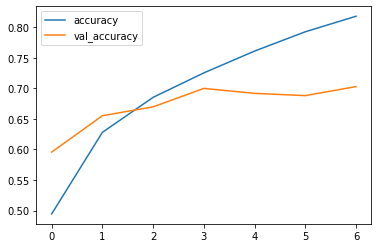

In [47]:
metrics[['accuracy','val_accuracy']].plot()

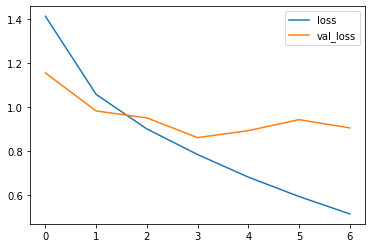

In [48]:
metrics[['loss','val_loss']].plot()

In [49]:
model.metrics_names

['loss', 'accuracy']

In [50]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[0.9051185033798218, 0.7029]


In [51]:
print(y_test.shape)

(10000, 1)


In [52]:
from sklearn.metrics import classification_report,confusion_matrix

predictions = model.predict_classes(x_test)
print(predictions.shape)
predictions[-10:]

(10000,)


array([7, 0, 3, 3, 3, 3, 6, 5, 4, 7])

In [53]:
#same as above 1
pred1 = model.predict(x_test)
pred1[-10:]

array([[1.50665063e-08, 1.31869680e-11, 1.42183211e-07, 3.83958779e-03,
        1.43839879e-05, 5.37966862e-02, 3.92150632e-08, 9.42349136e-01,
        9.38320621e-09, 1.90225382e-08],
       [9.53319132e-01, 1.14919217e-02, 2.40950249e-06, 2.21069897e-07,
        1.18934231e-05, 1.65337824e-05, 2.42682489e-07, 7.90963008e-04,
        1.40645876e-04, 3.42260450e-02],
       [1.91128966e-05, 3.14513272e-06, 5.83071378e-05, 9.57349896e-01,
        1.33552630e-05, 3.92497256e-02, 3.08017503e-03, 2.20501781e-04,
        1.85517342e-06, 3.95947427e-06],
       [8.56983206e-06, 3.08445550e-07, 2.96427279e-05, 6.11042142e-01,
        2.20643255e-04, 3.88283134e-01, 2.99793552e-04, 1.07346626e-04,
        2.62168692e-06, 5.75347440e-06],
       [6.52930408e-04, 2.49116449e-04, 2.88601732e-03, 5.28794527e-01,
        2.82232583e-01, 1.67059317e-01, 1.70164444e-02, 1.08993787e-03,
        8.24705967e-06, 1.09426474e-05],
       [1.23085396e-04, 6.55432013e-05, 3.83317019e-05, 6.34456515e-01,
   

In [54]:
#same as above 2
[x.argmax() for x in pred1][-10:]

[7, 0, 3, 3, 3, 3, 6, 5, 4, 7]

In [55]:
pd.DataFrame(y_test).equals(pd.DataFrame(predictions.reshape(10000,1))) #actual label and predicted label is not equal

False

![precision_reacall](precision_recall.png)

* precision = tp / (tp + fp) 
* recall = tp / (tp + fn) 

In [56]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76      1000
           1       0.78      0.84      0.81      1000
           2       0.54      0.65      0.59      1000
           3       0.55      0.50      0.52      1000
           4       0.66      0.61      0.63      1000
           5       0.61      0.56      0.59      1000
           6       0.72      0.80      0.76      1000
           7       0.75      0.78      0.77      1000
           8       0.85      0.78      0.82      1000
           9       0.82      0.75      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000



In [57]:
confusion_matrix(y_test,predictions)

array([[747,  26,  55,  14,  21,  11,  13,  17,  57,  39],
       [ 14, 840,  14,  10,   2,   2,  12,   5,  25,  76],
       [ 60,   4, 652,  39,  74,  61,  55,  38,  10,   7],
       [ 12,  13, 113, 502,  62, 162,  80,  34,  12,  10],
       [ 21,   7, 118,  56, 614,  32,  74,  70,   6,   2],
       [ 10,   3,  90, 168,  62, 565,  45,  51,   2,   4],
       [  1,  10,  69,  51,  35,  24, 799,   7,   2,   2],
       [ 13,   4,  48,  39,  54,  53,   7, 779,   2,   1],
       [ 64,  51,  24,  19,  10,   7,   8,   8, 780,  29],
       [ 27, 123,  20,  15,   2,  11,  10,  24,  17, 751]])

(10, 0)

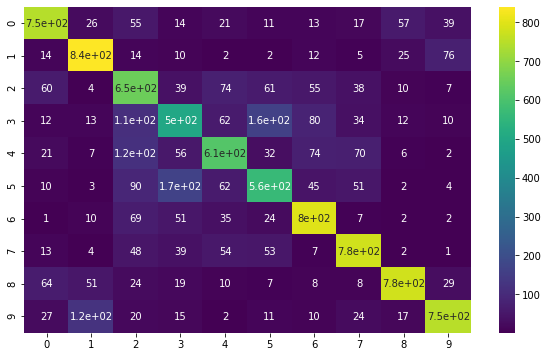

In [58]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True, cmap="viridis")
plt.ylim(10,0)
# https://github.com/matplotlib/matplotlib/issues/14751

### model2 : without early stopping

In [59]:
#model 2 
cnn = tf.keras.Sequential()

cnn.add(tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (32,32,3)))
cnn.add(tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'))
cnn.add(tf.keras.layers.MaxPooling2D(2,2))
cnn.add(tf.keras.layers.Dropout(0.3))


cnn.add(tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'))
cnn.add(tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'))
cnn.add(tf.keras.layers.MaxPooling2D(2,2))
cnn.add(tf.keras.layers.Dropout(0.3))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(1024, activation = 'relu'))
cnn.add(tf.keras.layers.Dropout(0.3))

cnn.add(tf.keras.layers.Dense(1024, activation = 'relu'))

cnn.add(tf.keras.layers.Dense(10, activation = 'softmax'))


In [60]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)         

In [61]:
cnn.compile(optimizer = tf.keras.optimizers.RMSprop(0.0001, decay = 1e-6), loss ='categorical_crossentropy', metrics =['accuracy'])

In [62]:
# model.fit(x_train,y_cat_train,epochs=15,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

cnn.fit(x_train, y_cat_train, batch_size = 512, epochs=100)

Train on 50000 samples
Epoch 1/100
50000/50000 [==============================] - 4s 77us/sample - loss: 2.0917 - accuracy: 0.2294
Epoch 2/100
50000/50000 [==============================] - 3s 54us/sample - loss: 1.8636 - accuracy: 0.3276
Epoch 3/100
50000/50000 [==============================] - 3s 54us/sample - loss: 1.7547 - accuracy: 0.3673
Epoch 4/100
50000/50000 [==============================] - 3s 54us/sample - loss: 1.6770 - accuracy: 0.3954
Epoch 5/100
50000/50000 [==============================] - 3s 54us/sample - loss: 1.6055 - accuracy: 0.4225
Epoch 6/100
50000/50000 [==============================] - 3s 54us/sample - loss: 1.5542 - accuracy: 0.4387
Epoch 7/100
50000/50000 [==============================] - 3s 54us/sample - loss: 1.5036 - accuracy: 0.4577
Epoch 8/100
50000/50000 [==============================] - 3s 54us/sample - loss: 1.4672 - accuracy: 0.4711
Epoch 9/100
50000/50000 [==============================] - 3s 54us/sample - loss: 1.4305 - accuracy: 0.4851
Epoch

50000/50000 [==============================] - 3s 55us/sample - loss: 0.5830 - accuracy: 0.7967
Epoch 77/100
50000/50000 [==============================] - 3s 55us/sample - loss: 0.5784 - accuracy: 0.7980
Epoch 78/100
50000/50000 [==============================] - 3s 54us/sample - loss: 0.5682 - accuracy: 0.8005
Epoch 79/100
50000/50000 [==============================] - 3s 55us/sample - loss: 0.5614 - accuracy: 0.8034
Epoch 80/100
50000/50000 [==============================] - 3s 55us/sample - loss: 0.5561 - accuracy: 0.8030
Epoch 81/100
50000/50000 [==============================] - 3s 55us/sample - loss: 0.5466 - accuracy: 0.8065
Epoch 82/100
50000/50000 [==============================] - 3s 55us/sample - loss: 0.5400 - accuracy: 0.8092
Epoch 83/100
50000/50000 [==============================] - 3s 55us/sample - loss: 0.5356 - accuracy: 0.8103
Epoch 84/100
50000/50000 [==============================] - 3s 55us/sample - loss: 0.5317 - accuracy: 0.8130
Epoch 85/100
50000/50000 [======

In [63]:
evaluation = cnn.evaluate(x_test, y_cat_test, verbose=0)
print('Test Accuracy: {}'.format(evaluation[1]))

Test Accuracy: 0.7678999900817871


In [64]:
predicted_classes = cnn.predict_classes(X_test) 
predicted_classes

NameError: name 'X_test' is not defined

In [ ]:
y_test

In [ ]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)   

### model3  :  fit with validation_data=(x_test, y_cat_test)

In [ ]:
#model 2 
cnn2 = tf.keras.Sequential()

cnn2.add(tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (32,32,3)))
cnn2.add(tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'))
cnn2.add(tf.keras.layers.MaxPooling2D(2,2))
cnn2.add(tf.keras.layers.Dropout(0.3))


cnn2.add(tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'))
cnn2.add(tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'))
cnn2.add(tf.keras.layers.MaxPooling2D(2,2))
cnn2.add(tf.keras.layers.Dropout(0.3))

cnn2.add(tf.keras.layers.Flatten())

cnn2.add(tf.keras.layers.Dense(1024, activation = 'relu'))
cnn2.add(tf.keras.layers.Dropout(0.3))

cnn2.add(tf.keras.layers.Dense(1024, activation = 'relu'))

cnn2.add(tf.keras.layers.Dense(10, activation = 'softmax'))


In [ ]:
cnn2.summary()

In [ ]:
cnn2.compile(optimizer = tf.keras.optimizers.RMSprop(0.0001, decay = 1e-6), loss ='categorical_crossentropy', metrics =['accuracy'])

In [ ]:
# model.fit(x_train,y_cat_train,epochs=15,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

cnn2.fit(x_train, y_cat_train, validation_data=(x_test,y_cat_test), batch_size = 512, epochs=100)

In [ ]:
evaluation = cnn.evaluate(x_test, y_cat_test, verbose=0)
print('Test Accuracy: {}'.format(evaluation[1]))

In [ ]:
predicted_classes = cnn.predict_classes(X_test) 
predicted_classes

In [ ]:
y_test

##### metrics 

In [ ]:
metrics = pd.DataFrame(model.history.history)
metrics

In [ ]:
metrics.columns

In [ ]:
metrics[['accuracy','val_accuracy']].plot()

In [ ]:
metrics[['loss','val_loss']].plot()

In [ ]:
print(cnn2.metrics_names)
print(cnn2.evaluate(x_test,y_cat_test,verbose=0))

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

predictions = model.predict_classes(x_test)
print(predictions.shape)
predictions[-10:]

In [ ]:
y_test

In [ ]:
print(classification_report(y_test,predictions))

In [ ]:
confusion_matrix(y_test,predictions)

# Predicting a given image

In [53]:
my_image = x_test[16]

In [54]:
my_image.shape

(32, 32, 3)

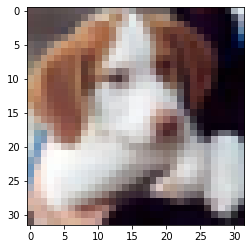

In [55]:
plt.imshow(my_image)

In [56]:
# SHAPE --> (num_images,width,height,color_channels)
model.predict_classes(my_image.reshape(1,32,32,3))

array([5])

In [110]:
# 5 is DOG
# https://www.cs.toronto.edu/~kriz/cifar.html